In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
conn = sqlite3.connect("../db.sqlite3")
query = """
SELECT 
    ro.*,
    roi.*,
    rp.*
FROM 
    restaurant_order ro
LEFT JOIN 
    restaurant_orderitem roi ON ro.id = roi.order_id
LEFT JOIN 
    restaurant_product rp ON roi.product_id = rp.id
"""

df = pd.read_sql_query(query, conn)

df.to_csv("data.csv", index=False)

conn.close()

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

   product_id  quantity                  name
0           6     10648         Plain Papadum
1          15      6367            Pilau Rice
2          11      4983            Plain Naan
3          19      3318           Garlic Naan
4          18      2964            Plain Rice
5          28      2749          Onion Bhajee
6           3      2504         Mango Chutney
7         103      2473  Chicken Tikka Masala
8           8      1935               Chapati
9           1      1840            Mint Sauce


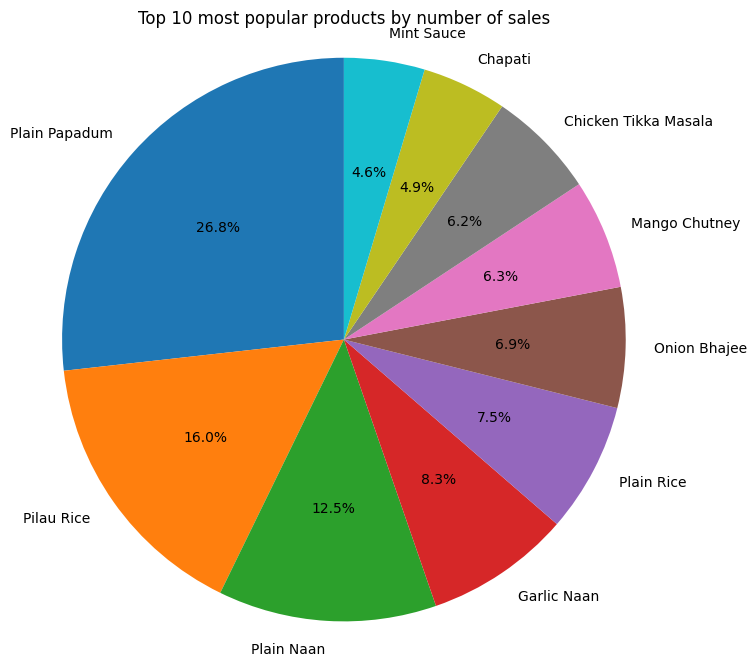

In [3]:
df = pd.read_csv("data.csv")
product_sales = df.groupby("product_id")["quantity"].sum().reset_index()
top_10_products = product_sales.sort_values(by="quantity", ascending=False).head(10)
product_df = df[["product_id", "name"]].drop_duplicates()
top_10_products = pd.merge(top_10_products, product_df[["product_id", "name"]], on="product_id", how="inner")

plt.figure(figsize=(8, 8))
plt.pie(top_10_products["quantity"], labels=top_10_products["name"], autopct="%1.1f%%", startangle=90)
plt.title("Top 10 most popular products by number of sales")
plt.axis("equal")
print(top_10_products)
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

   product_id  item_price                  name
0         103    22133.35  Chicken Tikka Masala
1          15    18782.65            Pilau Rice
2          11    12955.80            Plain Naan
3         157    12261.50                 Korma
4          73    10894.45           Bombay Aloo
5          28    10858.55          Onion Bhajee
6         167    10626.60        Butter Chicken
7          19     9788.10           Garlic Naan
8         102     9764.45       Korma - Chicken
9          18     8743.80            Plain Rice


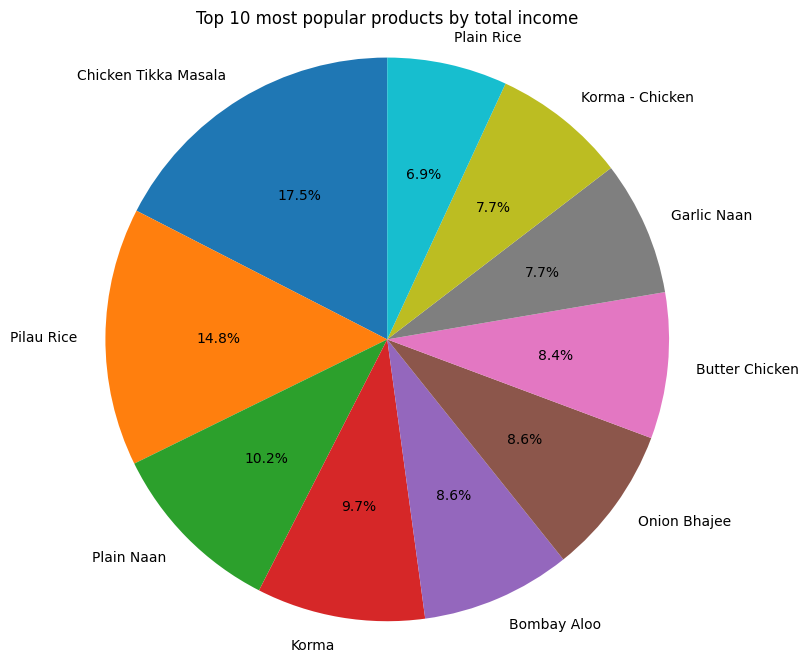

In [4]:
df["item_price"] = df["price"] * df["quantity"]
product_sales = df.groupby("product_id")["item_price"].sum().reset_index()
top_10_products = product_sales.sort_values(by="item_price", ascending=False).head(10)
product_df = df[["product_id", "name"]].drop_duplicates()
top_10_products = pd.merge(top_10_products, product_df[["product_id", "name"]], on="product_id", how="inner")

plt.figure(figsize=(8, 8))
plt.pie(top_10_products["item_price"], labels=top_10_products["name"], autopct="%1.1f%%", startangle=90)
plt.title("Top 10 most popular products by total income")
plt.axis("equal")
print(top_10_products)
plt.show()



# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

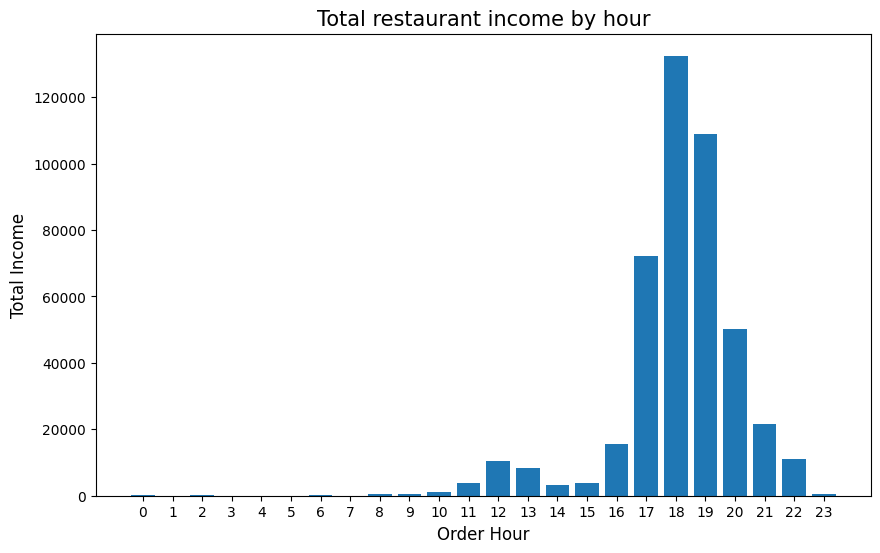

In [27]:
df["order_hour"] = pd.to_datetime(df["datetime"]).dt.hour
order_prices = df.groupby("order_hour")["item_price"].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(order_prices["order_hour"], order_prices["item_price"])
plt.xlabel("Order Hour", fontsize=12)
plt.ylabel("Total Income", fontsize=12)
plt.title("Total restaurant income by hour", fontsize=15)
plt.xticks(np.arange(0, 24, 1))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

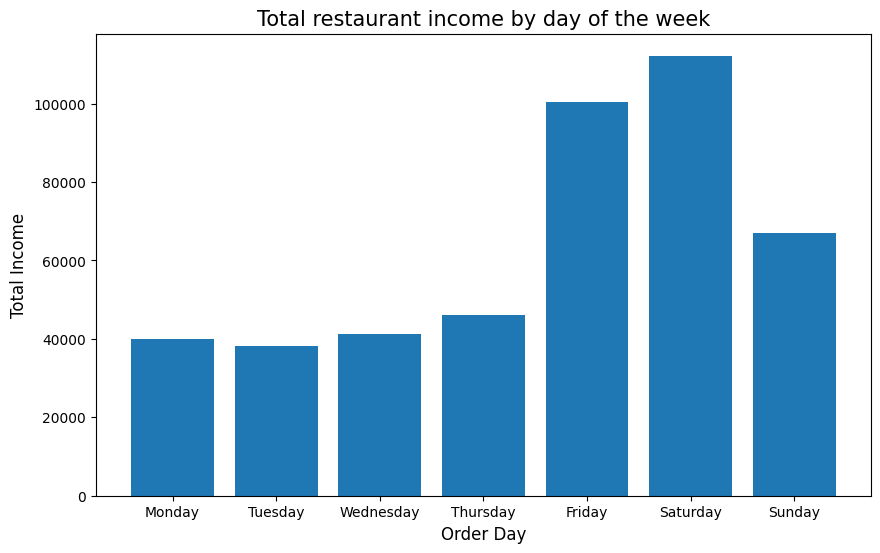

In [5]:
df["order_day"] = pd.to_datetime(df["datetime"]).dt.dayofweek
order_prices = df.groupby("order_day")["item_price"].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(order_prices["order_day"], order_prices["item_price"])
plt.xlabel("Order Day", fontsize=12)
plt.ylabel("Total Income", fontsize=12)
plt.title("Total restaurant income by day of the week", fontsize=15)
plt.xticks(np.arange(0, 7, 1), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()